# Day 2 Project: 중고차 가격 데이터

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car_df = pd.read_csv('~/aiffel/0122_ManageData/data/cars.csv')

In [3]:
brand_df = pd.read_csv('~/aiffel/0122_ManageData/data/brand.csv')

In [4]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


#### title
car - 'title'의 앞 단어가 brand - 'title'과 일치한다   
car의 'title'의 앞 단어만 추출 후 소문자로 변경하면 두 데이터를 합칠 수 있다

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [7]:
brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


In [8]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [9]:
car_df['Service history'].value_counts()

Full    540
Name: Service history, dtype: int64

---
#### Registration_Year
현재는 2024년이기 때문에 미래인 2025년 데이터는 삭제해야 한다

#### Fuel type
Fuel type이 몇 종류인지 확인한다. 아마 원핫인코딩이 가능할 거 같다

#### Body type
Body type이 몇 종류인지 확인한다. 아마 원핫인코딩이 가능할 거 같다

#### Engine
데이터타입이 object인데 문자+숫자인 거 같으니 내용 확인 후 처리

#### Gearbox
Gearbox가 몇 종류인지 확인한다. 아마 원핫인코딩이 가능할 거 같다

#### Doors
int형으로 바꿔도 될 거 같고, 총 몇 종류가 있는지 확인한다

#### Seats
int형으로 바꿔도 될 거 같고, 총 몇 종류가 있는지 확인한다

#### Emission Class
데이터타입이 object인데 문자+숫자인 거 같으니 내용 확인 후 처리

#### Service history
Full 아니면 NaN 으로 채워져있는 거 같다. 아마 원핫인코딩이 가능할 거 같다

---

### 중복치 제거하기

#### (1) 중복치 확인하기

In [10]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [11]:
car_df[car_df.duplicated()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
12,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
20,CITROEN C4,1949,114000,2013,NaN,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,NaN
25,VAUXHALL INSIGNIA,2950,79000,2011,4.0,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 5,NaN
39,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,NaN
52,VAUXHALL CORSA,10698,22782,2020,NaN,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,MINI HATCH,11999,33156,2018,1.0,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full
3663,VAUXHALL ASTRA,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,NaN
3674,MITSUBISHI OUTLANDER,1489,145000,2007,NaN,Diesel,SUV,2.0L,Manual,5.0,7.0,Euro 4,NaN
3675,VAUXHALL ASTRA,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,NaN


#### (2) 중복된 값 중 첫번째 값만 남겨놓고 제거하기

In [12]:
car_df = car_df.drop_duplicates(keep = 'first')

In [13]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


## Step 1. 이것만큼은 꼭 해보세요!
### 1. cars.csv와 brand.csv의 데이터 합치기   
[힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.

#### (1) 혹시 모를 일을 대비해 used_car_df 데이터프레임으로 car_df를 복제한다

In [14]:
used_car_df = car_df.copy()
used_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


#### (2) used_car_df 의 'title'의 공백 기준으로 앞의 단어만 추출해 소문자로 바꿔서 대체한다

In [15]:
used_car_df['title'] = (used_car_df['title'].str.split(' ').str[0]).str.lower()
used_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,audi,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,bmw,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,honda,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


#### (3) used_car_df와 brand_df를 'title'을 기준으로 합친다

In [16]:
used_car_df = used_car_df.merge(brand_df, on = 'title', how = 'inner')
used_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,skoda,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,Czech Republic
2,skoda,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,Czech Republic
3,skoda,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,Czech Republic
4,skoda,2490,56000,2003,NaN,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,Euro 4,NaN,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,maserati,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,Italy
2855,ssangyong,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN,South Korea
2856,ssangyong,4277,82400,2013,NaN,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full,South Korea
2857,lagonda,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN,United Kingdom


### 2. 카테고리형 변수를 숫자 형태로 변환하기
[힌트] Engine, Emission Class 변수에 주목하세요!

#### (1) 'Engine'과 'Emission Class'의 데이터 확인

In [17]:
# 'Engine' 고유값 확인
used_car_df['Engine'].unique()

array(['1.4L', '1.9L', '1.2L', '1.8L', '1.6L', '2.0L', '1.0L', '1.5L',
       '1.3L', '2.2L', '2.8L', '1.7L', nan, '1.1L', '3.0L', '5.0L',
       '2.5L', '2.3L', '2.4L', '2.7L', '4.4L', '4.8L', '3.7L', '2.6L',
       '2.1L', '3.5L', '3.2L', '5.5L', '6.3L', '0.9L', '3.1L', '4.3L',
       '4.2L', '0.8L', '3.3L'], dtype=object)

'Engine' 컬럼 값들의 형식은 실수 + 'L' 이다.   
문자열인 L을 없애고 실수형으로 변환하는 것이 데이터 분석에 효율적인 형식으로 보인다.

In [18]:
# 'Emission Class'고유값 확인
used_car_df['Emission Class'].unique()

array(['Euro 6', 'Euro 4', 'Euro 5', 'Euro 3', 'Euro 2', nan, 'Euro 1'],
      dtype=object)

'Emission Class' 컬럼 값들의 형식은 'Euro' + 정수 이다.   
문자열인 Euro를 없애고 정수형으로 변환하는 것이 데이터 분석에 효율적인 형식으로 보인다.

#### (2) 문자열 / 숫자열 구분 및 문자열 제거

In [19]:
used_car_df['Engine'] = used_car_df['Engine'].str[:-1]

In [20]:
used_car_df['Engine']

0       1.4
1       1.9
2       1.4
3       1.2
4       1.8
       ... 
2854    4.2
2855    2.2
2856    2.0
2857    2.6
2858    NaN
Name: Engine, Length: 2859, dtype: object

In [21]:
used_car_df['Emission Class'] = used_car_df['Emission Class'].str.split(' ').str[1]

In [22]:
used_car_df['Emission Class']

0         6
1         4
2         4
3         5
4         4
       ... 
2854      4
2855      6
2856      5
2857    NaN
2858    NaN
Name: Emission Class, Length: 2859, dtype: object

#### (3) pd.to_numeric 함수 적용

In [23]:
used_car_df['Engine'] = pd.to_numeric(used_car_df['Engine'])
used_car_df['Emission Class']  = pd.to_numeric(used_car_df['Emission Class'])

In [24]:
used_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,Czech Republic
1,skoda,1990,150000,2007,2.0,Diesel,Hatchback,1.9,Manual,5.0,5.0,4.0,Full,Czech Republic
2,skoda,1995,84000,2008,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,NaN,Czech Republic
3,skoda,2495,124138,2011,3.0,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5.0,NaN,Czech Republic
4,skoda,2490,56000,2003,NaN,Petrol,Hatchback,1.8,Automatic,5.0,5.0,4.0,NaN,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,maserati,10000,72000,2009,3.0,Petrol,Saloon,4.2,Automatic,4.0,5.0,4.0,Full,Italy
2855,ssangyong,12995,42771,2018,2.0,Diesel,SUV,2.2,Automatic,5.0,5.0,6.0,NaN,South Korea
2856,ssangyong,4277,82400,2013,NaN,Diesel,SUV,2.0,Automatic,5.0,5.0,5.0,Full,South Korea
2857,lagonda,14995,84000,1953,NaN,Petrol,Saloon,2.6,Manual,4.0,NaN,NaN,NaN,United Kingdom


In [25]:
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859 entries, 0 to 2858
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2859 non-null   object 
 1   Price              2859 non-null   int64  
 2   Mileage(miles)     2859 non-null   int64  
 3   Registration_Year  2859 non-null   int64  
 4   Previous Owners    1876 non-null   float64
 5   Fuel type          2859 non-null   object 
 6   Body type          2859 non-null   object 
 7   Engine             2842 non-null   float64
 8   Gearbox            2859 non-null   object 
 9   Doors              2834 non-null   float64
 10  Seats              2824 non-null   float64
 11  Emission Class     2800 non-null   float64
 12  Service history    446 non-null    object 
 13  country            2859 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 335.0+ KB


#### (4) Previous Owners, Doors, Seats, Emission Class 정수형으로 변경

In [26]:
used_car_df['Previous Owners'].unique()

array([ 3.,  2., nan,  4.,  8.,  1.,  5.,  6.,  9.,  7.])

In [27]:
used_car_df['Doors'].unique()

array([ 5.,  4.,  3.,  2., nan])

In [28]:
used_car_df['Seats'].unique()

array([ 5.,  4.,  7.,  2., nan,  6.,  3.])

In [29]:
used_car_df['Emission Class'].unique()

array([ 6.,  4.,  5.,  3.,  2., nan,  1.])

세 컬럼의 값들은 무조건 정수형으로 표현이 가능하므로 정수형으로 변경한다.

In [30]:
used_car_df['Previous Owners'] = used_car_df['Previous Owners'].astype('Int64')
used_car_df['Doors'] = used_car_df['Doors'].astype('Int64')
used_car_df['Seats'] = used_car_df['Seats'].astype('Int64')
used_car_df['Emission Class'] = used_car_df['Emission Class'].astype('Int64')

In [31]:
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859 entries, 0 to 2858
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2859 non-null   object 
 1   Price              2859 non-null   int64  
 2   Mileage(miles)     2859 non-null   int64  
 3   Registration_Year  2859 non-null   int64  
 4   Previous Owners    1876 non-null   Int64  
 5   Fuel type          2859 non-null   object 
 6   Body type          2859 non-null   object 
 7   Engine             2842 non-null   float64
 8   Gearbox            2859 non-null   object 
 9   Doors              2834 non-null   Int64  
 10  Seats              2824 non-null   Int64  
 11  Emission Class     2800 non-null   Int64  
 12  Service history    446 non-null    object 
 13  country            2859 non-null   object 
dtypes: Int64(4), float64(1), int64(3), object(6)
memory usage: 346.2+ KB


### 3. 결측치 처리하기
[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.

#### (1) 결측치 갯수, 비율 확인하기

In [32]:
used_car_df.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners       983
Fuel type               0
Body type               0
Engine                 17
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         59
Service history      2413
country                 0
dtype: int64

In [33]:
used_car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.343827
Fuel type            0.000000
Body type            0.000000
Engine               0.005946
Gearbox              0.000000
Doors                0.008744
Seats                0.012242
Emission Class       0.020637
Service history      0.844001
country              0.000000
dtype: float64

#### (2) Service history 결측치 처리하기

In [34]:
# 1. 결측치 'Unknown'으로 채우기
used_car_df['Service history'] = used_car_df['Service history'].fillna('Unknown')

In [35]:
used_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3,Diesel,Hatchback,1.4,Manual,5,5,6,Unknown,Czech Republic
1,skoda,1990,150000,2007,2,Diesel,Hatchback,1.9,Manual,5,5,4,Full,Czech Republic
2,skoda,1995,84000,2008,<NA>,Petrol,Hatchback,1.4,Manual,5,5,4,Unknown,Czech Republic
3,skoda,2495,124138,2011,3,Petrol,Hatchback,1.2,Automatic,5,5,5,Unknown,Czech Republic
4,skoda,2490,56000,2003,<NA>,Petrol,Hatchback,1.8,Automatic,5,5,4,Unknown,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,maserati,10000,72000,2009,3,Petrol,Saloon,4.2,Automatic,4,5,4,Full,Italy
2855,ssangyong,12995,42771,2018,2,Diesel,SUV,2.2,Automatic,5,5,6,Unknown,South Korea
2856,ssangyong,4277,82400,2013,<NA>,Diesel,SUV,2.0,Automatic,5,5,5,Full,South Korea
2857,lagonda,14995,84000,1953,<NA>,Petrol,Saloon,2.6,Manual,4,<NA>,<NA>,Unknown,United Kingdom


In [36]:
used_car_df.isna().sum()

title                  0
Price                  0
Mileage(miles)         0
Registration_Year      0
Previous Owners      983
Fuel type              0
Body type              0
Engine                17
Gearbox                0
Doors                 25
Seats                 35
Emission Class        59
Service history        0
country                0
dtype: int64

In [37]:
used_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3,Diesel,Hatchback,1.4,Manual,5,5,6,Unknown,Czech Republic
1,skoda,1990,150000,2007,2,Diesel,Hatchback,1.9,Manual,5,5,4,Full,Czech Republic
2,skoda,1995,84000,2008,<NA>,Petrol,Hatchback,1.4,Manual,5,5,4,Unknown,Czech Republic
3,skoda,2495,124138,2011,3,Petrol,Hatchback,1.2,Automatic,5,5,5,Unknown,Czech Republic
4,skoda,2490,56000,2003,<NA>,Petrol,Hatchback,1.8,Automatic,5,5,4,Unknown,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,maserati,10000,72000,2009,3,Petrol,Saloon,4.2,Automatic,4,5,4,Full,Italy
2855,ssangyong,12995,42771,2018,2,Diesel,SUV,2.2,Automatic,5,5,6,Unknown,South Korea
2856,ssangyong,4277,82400,2013,<NA>,Diesel,SUV,2.0,Automatic,5,5,5,Full,South Korea
2857,lagonda,14995,84000,1953,<NA>,Petrol,Saloon,2.6,Manual,4,<NA>,<NA>,Unknown,United Kingdom


#### (3) 문과 좌석수 상관관계 확인하기

In [38]:
used_car_df[(used_car_df['Doors'].isna()) | (used_car_df['Seats'].isna())]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
120,vauxhall,3950,56800,2015,4,Diesel,Hatchback,1.7,Manual,<NA>,5,<NA>,Unknown,United Kingdom
299,vauxhall,4250,35616,2010,1,Diesel,Combi Van,1.3,Manual,3,<NA>,4,Unknown,United Kingdom
324,vauxhall,5995,76000,2014,3,Diesel,Coupe,NaN,Manual,<NA>,<NA>,<NA>,Unknown,United Kingdom
737,ford,2490,68837,2007,4,Petrol,Hatchback,NaN,Manual,<NA>,<NA>,<NA>,Full,United States
921,volvo,750,225318,2025,<NA>,Petrol,Estate,2.3,Automatic,5,<NA>,<NA>,Unknown,Sweden
1171,bmw,4200,68060,2007,1,Petrol,Saloon,NaN,Automatic,<NA>,<NA>,<NA>,Full,Germany
1196,bmw,6700,105000,1999,7,Petrol,Coupe,2.5,Manual,2,<NA>,2,Unknown,Germany
1204,bmw,4000,94000,2007,2,Petrol,Saloon,2.5,Automatic,<NA>,<NA>,<NA>,Unknown,Germany
1217,bmw,3495,115000,1987,4,Petrol,Saloon,1.8,Automatic,4,<NA>,<NA>,Unknown,Germany
1250,bmw,11490,104000,2015,<NA>,Diesel,Saloon,2.0,Automatic,4,<NA>,<NA>,Unknown,Germany


<AxesSubplot:xlabel='Doors', ylabel='Seats'>

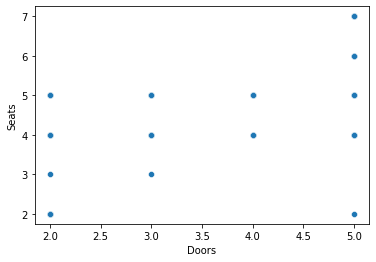

In [39]:
sns.scatterplot(x = used_car_df['Doors'], y = used_car_df['Seats'])

seats가 6이나 7개이면 Doors는 5개, Seats가 2개면 Doors는 2개일 확률이 매우 높다
Seats가 2, 6, 7인 경우는 결측치를 채울 수 있다

In [40]:
two_seats = used_car_df[(used_car_df['Seats'] == 2) & (used_car_df['Doors'].isna())]
two_seats

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2851,marcos,11495,19000,1981,5,Petrol,Convertible,2.0,Manual,<NA>,2,<NA>,Unknown,United Kingdom


In [41]:
(two_seats).index

Int64Index([2851], dtype='int64')

In [42]:
used_car_df.loc[(two_seats).index, 'Doors'] = 2
used_car_df.loc[(two_seats).index]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2851,marcos,11495,19000,1981,5,Petrol,Convertible,2.0,Manual,2,2,<NA>,Unknown,United Kingdom


In [43]:
six_seven_seats = used_car_df[((used_car_df['Seats'] == 6) | (used_car_df['Seats'] == 7)) & (used_car_df['Doors'].isna())]
six_seven_seats

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2140,nissan,4200,96000,2017,3,Petrol,Minibus,2.0,Automatic,<NA>,7,<NA>,Unknown,Japan


In [44]:
used_car_df.loc[(six_seven_seats).index, 'Doors'] = 5
used_car_df.loc[(six_seven_seats).index]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2140,nissan,4200,96000,2017,3,Petrol,Minibus,2.0,Automatic,5,7,<NA>,Unknown,Japan


#### (4) Previous Owner 결측치 처리하기 
- 어떤 컬럼이 Previous Owners와 관계성을 가지고 있는지 확인

<AxesSubplot:xlabel='Previous Owners', ylabel='Registration_Year'>

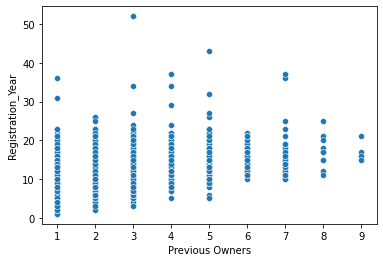

In [45]:
# Registration_Year
sns.scatterplot(x = used_car_df['Previous Owners'], y = 2024 - used_car_df['Registration_Year'])

<AxesSubplot:xlabel='Previous Owners', ylabel='Mileage(miles)'>

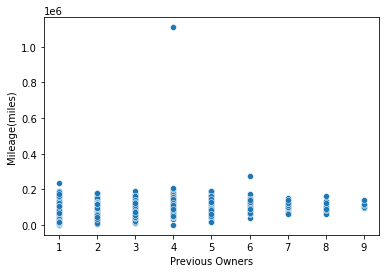

In [46]:
# Mileage(miles)'
sns.scatterplot(x = used_car_df['Previous Owners'], y = used_car_df['Mileage(miles)'])

<AxesSubplot:xlabel='Previous Owners', ylabel='Price'>

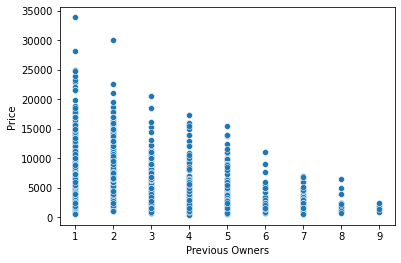

In [47]:
# Price
sns.scatterplot(x = used_car_df['Previous Owners'], y = used_car_df['Price'])

- 결측치 처리하기   
Price와 가장 관계성이 있어 보인다   
Previous Owners의 결측치는 그 개수가 많아 삭제할 수 없고 중고차 가격에 영향을 미치고 있기 때문에 컬럼도 삭제할 수가 없다   
   
처리 과정   
1. Previous Owner 별 Price의 최대값을 확인한다.
2. Previous Owener 결측치의 Price가 1에서 구한 각 최대값보다 큰 값에는 그보다 한 명 적은 Previous Owners 값으로 대체한다

In [48]:
# Previus Owners가 결측치가 아닌 데이터 중 각 Previous Owners 별로 Price 최고값 확인
used_car_df[used_car_df['Previous Owners'].notna()].groupby('Previous Owners')['Price'].max()

Previous Owners
1    33900
2    30000
3    20500
4    17394
5    15500
6    10995
7     6950
8     6500
9     2500
Name: Price, dtype: int64

In [49]:
# Previus Owners가 결측치 중 Price가 30000 초과인 값 -> 1로 대체
# Previus Owners가 결측치 중 Price가 20500 초과인 값 -> 2로 대체
# Previus Owners가 결측치 중 Price가 17394 초과인 값 -> 3으로 대체
# Previus Owners가 결측치 중 Price가 15500 초과인 값 -> 4로 대체
# Previus Owners가 결측치 중 Price가 10995 초과인 값 -> 5로 대체
# Previus Owners가 결측치 중 Price가 6950 초과인 값 -> 6으로 대체
# Previus Owners가 결측치 중 Price가 6500 초과인 값 -> 7로 대체
# Previus Owners가 결측치 중 Price가 2500 초과인 값 -> 8로 대체


one_owner = used_car_df[(used_car_df['Previous Owners'].isna()) & (used_car_df['Price'] > 30000)]
two_owner = used_car_df[(used_car_df['Previous Owners'].isna()) & (used_car_df['Price'] > 20500)]
three_owner = used_car_df[(used_car_df['Previous Owners'].isna()) & (used_car_df['Price'] > 17394)]
four_owner = used_car_df[(used_car_df['Previous Owners'].isna()) & (used_car_df['Price'] > 15500)]
five_owner = used_car_df[(used_car_df['Previous Owners'].isna()) & (used_car_df['Price'] > 10995)]
six_owner = used_car_df[(used_car_df['Previous Owners'].isna()) & (used_car_df['Price'] > 6950)]
seven_owner = used_car_df[(used_car_df['Previous Owners'].isna()) & (used_car_df['Price'] > 6500)]
eight_owner = used_car_df[(used_car_df['Previous Owners'].isna()) & (used_car_df['Price'] > 200)]

In [50]:
(one_owner).index

Int64Index([], dtype='int64')

In [51]:
(two_owner).index

Int64Index([870, 2096, 2703, 2704, 2706, 2709], dtype='int64')

In [52]:
(three_owner).index

Int64Index([870, 1286, 1952, 1953, 2096, 2411, 2681, 2703, 2704, 2706, 2709,
            2800],
           dtype='int64')

In [53]:
(four_owner).index

Int64Index([ 856,  870, 1265, 1286, 1463, 1476, 1541, 1565, 1952, 1953, 2096,
            2411, 2431, 2681, 2703, 2704, 2706, 2709, 2800, 2852],
           dtype='int64')

In [54]:
(five_owner).index

Int64Index([ 161,  173,  256,  343,  394,  399,  435,  497,  502,  582,  854,
             856,  870, 1053, 1211, 1249, 1250, 1265, 1266, 1267, 1286, 1304,
            1305, 1313, 1314, 1329, 1443, 1463, 1472, 1476, 1488, 1523, 1541,
            1565, 1568, 1615, 1775, 1799, 1811, 1816, 1821, 1912, 1924, 1952,
            1953, 2096, 2175, 2195, 2324, 2411, 2413, 2424, 2431, 2510, 2549,
            2609, 2617, 2619, 2635, 2661, 2678, 2681, 2688, 2703, 2704, 2706,
            2709, 2787, 2794, 2800, 2827, 2840, 2846, 2852, 2857],
           dtype='int64')

In [55]:
(six_owner).index

Int64Index([  18,   20,   31,   39,   56,  161,  173,  205,  221,  255,
            ...
            2800, 2803, 2827, 2835, 2838, 2840, 2841, 2846, 2852, 2857],
           dtype='int64', length=238)

In [56]:
(seven_owner).index

Int64Index([  18,   20,   31,   39,   56,  161,  173,  205,  221,  255,
            ...
            2803, 2822, 2827, 2835, 2838, 2840, 2841, 2846, 2852, 2857],
           dtype='int64', length=257)

In [57]:
(eight_owner).index

Int64Index([   2,    4,    5,   12,   13,   16,   18,   19,   20,   21,
            ...
            2838, 2840, 2841, 2846, 2847, 2850, 2852, 2856, 2857, 2858],
           dtype='int64', length=983)

In [58]:
used_car_df.loc[(one_owner).index, 'Previous Owners'] = 1
used_car_df.loc[(two_owner).index, 'Previous Owners'] = 2
used_car_df.loc[(three_owner).index, 'Previous Owners'] = 3
used_car_df.loc[(four_owner).index, 'Previous Owners'] = 4
used_car_df.loc[(five_owner).index, 'Previous Owners'] = 5
used_car_df.loc[(six_owner).index, 'Previous Owners'] = 6
used_car_df.loc[(seven_owner).index, 'Previous Owners'] = 7
used_car_df.loc[(eight_owner).index, 'Previous Owners'] = 8

In [59]:
used_car_df.isna().sum()

title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine               17
Gearbox               0
Doors                23
Seats                35
Emission Class       59
Service history       0
country               0
dtype: int64

#### Wow... 모든 Previous Owners 결측치가 처리 되었다

#### (5) Emission Class 결측치 처리하기 
- Emission Class와 Price 관계성 확인

<AxesSubplot:xlabel='Emission Class', ylabel='Price'>

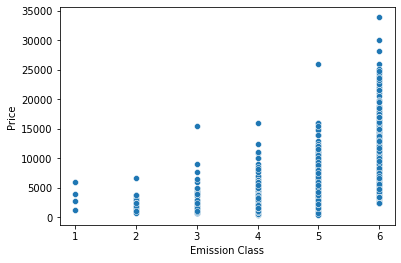

In [60]:
sns.scatterplot(x = used_car_df['Emission Class'], y = used_car_df['Price'])

Previous Owner 결측치 처리과정과 같은 방법을 사용한다.

In [61]:
# Emission Class가 결측치가 아닌 데이터 중 각 Previous Owners 별로 Price 최고값 확인
used_car_df[used_car_df['Emission Class'].notna()].groupby('Emission Class')['Price'].max()

Emission Class
1     5995
2     6700
3    15500
4    16000
5    25995
6    33900
Name: Price, dtype: int64

In [62]:
# Emission Class가 결측치 중 Price가 25995 초과인 값 -> 6으로 대체
# Emission Class가 결측치 중 Price가 16000 초과인 값 -> 5로 대체
# Emission Class가 결측치 중 Price가 15500 초과인 값 -> 4으로 대체
# Emission Class가 결측치 중 Price가 6700 초과인 값 -> 3로 대체
# Emission Class가 결측치 중 Price가 5995 초과인 값 -> 2로 대체


six_class = used_car_df[(used_car_df['Emission Class'].isna()) & (used_car_df['Price'] > 25995)]
five_class = used_car_df[(used_car_df['Emission Class'].isna()) & (used_car_df['Price'] > 16000)]
four_class = used_car_df[(used_car_df['Emission Class'].isna()) & (used_car_df['Price'] > 15500)]
three_class = used_car_df[(used_car_df['Emission Class'].isna()) & (used_car_df['Price'] > 6700)]
two_class = used_car_df[(used_car_df['Emission Class'].isna()) & (used_car_df['Price'] > 5995)]

In [63]:
(six_class).index

Int64Index([], dtype='int64')

In [64]:
(five_class).index

Int64Index([], dtype='int64')

In [65]:
(four_class).index

Int64Index([], dtype='int64')

In [66]:
(three_class).index

Int64Index([ 435, 1250, 1556, 1615, 1682, 1720, 1822, 1828, 1881, 1982, 2032,
            2036, 2079, 2552, 2651, 2660, 2792, 2830, 2851, 2857],
           dtype='int64')

In [67]:
(two_class).index

Int64Index([ 435, 1250, 1556, 1615, 1682, 1691, 1709, 1711, 1720, 1822, 1828,
            1877, 1881, 1982, 2032, 2036, 2039, 2079, 2552, 2651, 2660, 2792,
            2830, 2851, 2857],
           dtype='int64')

In [68]:
used_car_df.loc[(three_class).index, 'Emission Class'] = 3
used_car_df.loc[(two_class).index, 'Emission Class'] = 2

In [69]:
used_car_df.isna().sum()

title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine               17
Gearbox               0
Doors                23
Seats                35
Emission Class       34
Service history       0
country               0
dtype: int64

#### (6) 결측치가 일정 개수 이상 포함된 데이터 행 삭제

In [70]:
# 결측치가 2개 이상 포함된 데이터 행 삭제
# nan 값이 아닌 값이 12개 이상인 열만 유지 (thresh = 12)
# 컬럼이 총 13개이므로 1(13 - 12)개 초과의 값이 NaN 값이면 그 열은 삭제

used_car_df = used_car_df.dropna(axis = 0, thresh = 12)

In [71]:
used_car_df.isna().sum()

title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine                7
Gearbox               0
Doors                11
Seats                23
Emission Class       24
Service history       0
country               0
dtype: int64

In [72]:
used_car_df[used_car_df.isna( ).any(axis=1)]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
120,vauxhall,3950,56800,2015,4,Diesel,Hatchback,1.7,Manual,<NA>,5,<NA>,Unknown,United Kingdom
299,vauxhall,4250,35616,2010,1,Diesel,Combi Van,1.3,Manual,3,<NA>,4,Unknown,United Kingdom
356,vauxhall,9499,65767,2014,1,Petrol Plug-in Hybrid,Hatchback,NaN,Automatic,5,4,5,Unknown,United Kingdom
435,vauxhall,13998,28045,2020,8,Electric,Hatchback,NaN,Automatic,5,5,2,Unknown,United Kingdom
719,ford,1895,109000,2009,8,Petrol,Hatchback,NaN,Manual,5,5,<NA>,Unknown,United States
921,volvo,750,225318,2025,8,Petrol,Estate,2.3,Automatic,5,<NA>,<NA>,Unknown,Sweden
1196,bmw,6700,105000,1999,7,Petrol,Coupe,2.5,Manual,2,<NA>,2,Unknown,Germany
1217,bmw,3495,115000,1987,4,Petrol,Saloon,1.8,Automatic,4,<NA>,<NA>,Unknown,Germany
1250,bmw,11490,104000,2015,8,Diesel,Saloon,2.0,Automatic,4,<NA>,2,Unknown,Germany
1354,citroen,3250,126000,1995,4,Diesel,Hatchback,2.5,Manual,5,<NA>,2,Unknown,France


In [73]:
# 전 과정에서 이미 많은 결측치가 제거 되어 남은 결측치 값들은 다 제거한다.

used_car_df = used_car_df.dropna()
used_car_df[used_car_df.isna( ).any(axis=1)]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country


In [74]:
used_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3,Diesel,Hatchback,1.4,Manual,5,5,6,Unknown,Czech Republic
1,skoda,1990,150000,2007,2,Diesel,Hatchback,1.9,Manual,5,5,4,Full,Czech Republic
2,skoda,1995,84000,2008,8,Petrol,Hatchback,1.4,Manual,5,5,4,Unknown,Czech Republic
3,skoda,2495,124138,2011,3,Petrol,Hatchback,1.2,Automatic,5,5,5,Unknown,Czech Republic
4,skoda,2490,56000,2003,8,Petrol,Hatchback,1.8,Automatic,5,5,4,Unknown,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,maserati,16000,66000,2008,8,Petrol,Coupe,4.2,Automatic,2,4,4,Full,Italy
2853,maserati,13900,63000,2014,5,Diesel,Saloon,3.0,Automatic,4,5,5,Unknown,Italy
2854,maserati,10000,72000,2009,3,Petrol,Saloon,4.2,Automatic,4,5,4,Full,Italy
2855,ssangyong,12995,42771,2018,2,Diesel,SUV,2.2,Automatic,5,5,6,Unknown,South Korea


### 이상치 확인하기

<AxesSubplot:xlabel='Doors', ylabel='Seats'>

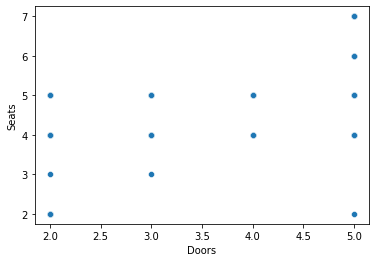

In [75]:
# Doors, Seats
sns.scatterplot(x = used_car_df['Doors'], y = used_car_df['Seats'])

In [76]:
two_S_five_D = used_car_df[(used_car_df['Seats']==2) & (used_car_df['Doors'] ==5)]
used_car_df.loc[(two_S_five_D ).index] 

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2452,fiat,2495,99000,2009,2,Petrol,Estate,1.4,Manual,5,2,4,Unknown,Italy


In [77]:
two_S_five_D = car_df[(car_df['Seats']==2) & (car_df['Doors'] ==5)]
car_df.loc[(two_S_five_D ).index] 

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
396,FIAT DOBLO,2495,99000,2009,2.0,Petrol,Estate,1.4L,Manual,5.0,2.0,Euro 4,NaN


In [78]:
used_car_df = used_car_df.drop(396)

In [79]:
used_car_df.loc[(used_car_df[(used_car_df['Seats']==2) & (used_car_df['Doors'] ==5)] ).index] 

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2452,fiat,2495,99000,2009,2,Petrol,Estate,1.4,Manual,5,2,4,Unknown,Italy


#### 2인승에 문이 5개인 차는 존재하지 않으므로 삭제 한다
(Fiat Doblo는 실제로 문이 5개, 5~7인승)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage(miles)'>

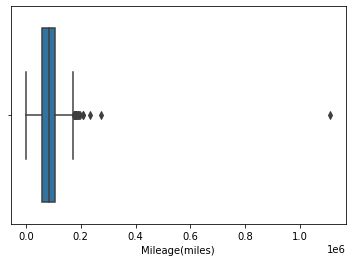

In [80]:
# Doors, Seats
sns.boxplot(used_car_df['Mileage(miles)'])

1000000 miles의 값은 이상치이므로 제거한다

In [81]:
used_car_df[used_car_df['Mileage(miles)'] > 1e6] 

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
1708,volkswagen,2495,1110100,2003,4,Petrol,Hatchback,2.0,Automatic,3,4,4,Unknown,Germany


In [82]:
used_car_df = used_car_df.drop(1037)

### 4. Scaler 활용해보기

#### 컬럼별 고유값 확인하기

In [91]:
used_car_df[['Fuel type','Body type','Gearbox','Service history', 'country']].nunique()

Fuel type           5
Body type           9
Gearbox             2
Service history     2
country            12
dtype: int64

In [92]:
used_car_df['title'].value_counts().tail(20)

dacia        14
lexus         9
mg            9
infiniti      7
saab          6
ds            6
jeep          6
chrysler      5
subaru        4
smart         4
rover         3
porsche       3
abarth        3
maserati      3
daihatsu      2
proton        2
ssangyong     2
daewoo        1
dodge         1
marcos        1
Name: title, dtype: int64

In [93]:
used_car_df['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong'],
      dtype=object)

In [94]:
# 'Body type' 고유값 확인
used_car_df['Body type'].unique()

array(['Hatchback', 'Estate', 'MPV', 'Saloon', 'SUV', 'Convertible',
       'Coupe', 'Combi Van', 'Pickup'], dtype=object)

In [95]:
# 'Gearbox' 고유값 확인
used_car_df['Gearbox'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [96]:
# 'Service history' 고유값 확인
used_car_df['Service history'].unique()

array(['Unknown', 'Full'], dtype=object)

In [97]:
# 'Fuel type' 고유값 확인
used_car_df['Fuel type'].unique()

array(['Diesel', 'Petrol', 'Petrol Hybrid', 'Petrol Plug-in Hybrid',
       'Diesel Hybrid'], dtype=object)

In [98]:
# 'country'고유값 확인
used_car_df['country'].unique()

array(['Czech Republic', 'United Kingdom', 'South Korea', 'United States',
       'Sweden', 'France', 'Germany', 'Japan', 'Spain', 'Italy',
       'Malaysia', 'Romania'], dtype=object)

### 원-핫 인코딩

#### 'Body type' / 'Gearbox' / 'Service history' / 'Fuel type' / 'country' / 'title' 원 핫 인코딩하기

In [99]:
one_hot_df = pd.get_dummies(used_car_df, columns = ['Body type', 'Gearbox', 'Service history', 'Fuel type','country', 'title'], drop_first = True)
one_hot_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
0,6900,70189,2016,3,1.4,5,5,6,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,150000,2007,2,1.9,5,5,4,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1995,84000,2008,8,1.4,5,5,4,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2495,124138,2011,3,1.2,5,5,5,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2490,56000,2003,8,1.8,5,5,4,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,16000,66000,2008,8,4.2,2,4,4,0,1,...,0,0,0,0,0,0,0,0,0,0
2853,13900,63000,2014,5,3.0,4,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2854,10000,72000,2009,3,4.2,4,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2855,12995,42771,2018,2,2.2,5,5,6,0,0,...,0,0,0,1,0,0,0,0,0,0


### 아웃라이어 확인

In [100]:
one_hot_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
count,2799.000000,2.799000e+03,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,...,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000
mean,5334.494105,8.403954e+04,2011.415148,4.628081,1.645373,4.326188,4.888532,4.813148,0.031797,0.037156,...,0.016434,0.016792,0.001429,0.000715,0.001429,0.012147,0.035727,0.138978,0.070025,0.011790
std,4136.520806,3.960036e+04,4.557613,2.730433,0.515714,0.981456,0.589769,0.887785,0.175491,0.189178,...,0.127162,0.128513,0.037783,0.026726,0.037783,0.109562,0.185642,0.345986,0.255235,0.107959
min,400.000000,1.000000e+00,1981.000000,1.000000,0.800000,2.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2449.000000,6.000000e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3995.000000,8.365000e+04,2011.000000,4.000000,1.600000,5.000000,5.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6995.000000,1.054860e+05,2014.000000,8.000000,2.000000,5.000000,5.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

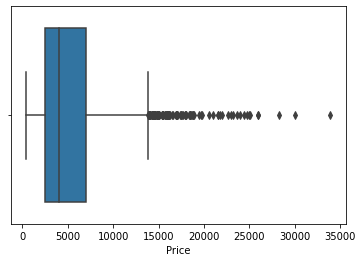

In [101]:
# Price
sns.boxplot(one_hot_df['Price'])

#### -> Price - Robust Scaling

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage(miles)'>

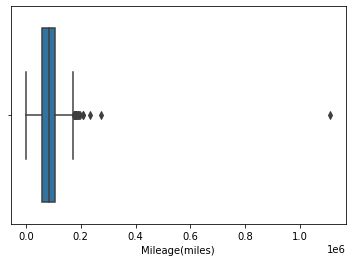

In [102]:
# Price
sns.boxplot(one_hot_df['Mileage(miles)'])

#### -> Mileage(miles) - Robust Scaling

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Registration_Year'>

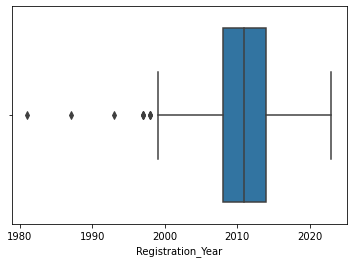

In [103]:
# Price
sns.boxplot(one_hot_df['Registration_Year'])

#### -> Registration_Year - Robust Scaling

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previous Owners'>

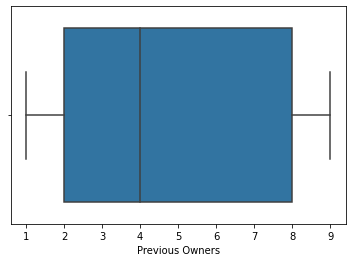

In [104]:
# Price
sns.boxplot(one_hot_df['Previous Owners'])

#### -> Previous Owners - Standardization 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine'>

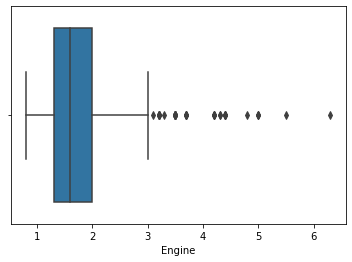

In [105]:
# Price
sns.boxplot(one_hot_df['Engine'])

#### -> Registration_Year - Robust Scaling

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors'>

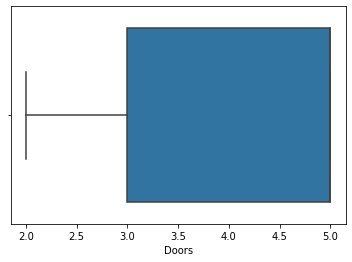

In [106]:
# Price
sns.boxplot(one_hot_df['Doors'])

#### -> Doors - Standardization 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats'>

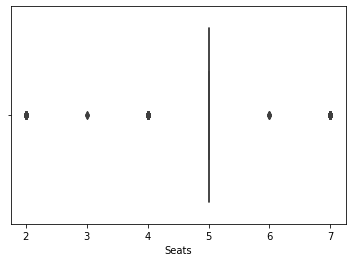

In [107]:
# Price
sns.boxplot(one_hot_df['Seats'])

#### -> Registration_Year - ?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emission Class'>

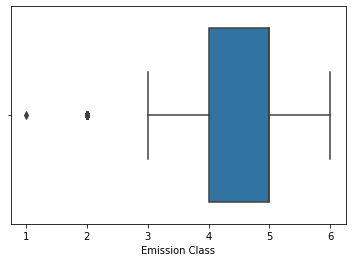

In [108]:
# Price
sns.boxplot(one_hot_df['Emission Class'])

#### -> Emission Class - Standardization

In [109]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [110]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [111]:
ss.fit(one_hot_df)

StandardScaler()

In [112]:
ss_df = pd.DataFrame(ss.transform(one_hot_df), columns = one_hot_df.columns)

In [113]:
rs.fit(one_hot_df)

RobustScaler()

In [114]:
rs_df = pd.DataFrame(rs.transform(one_hot_df), columns = one_hot_df.columns)

In [115]:
mm.fit(one_hot_df)

MinMaxScaler()

In [116]:
mm_df = pd.DataFrame(mm.transform(one_hot_df), columns = one_hot_df.columns)

In [117]:
ss_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
0,0.378527,-0.349820,1.006156,-0.596379,-0.475879,0.686666,0.189037,1.337109,-0.181222,-0.196443,...,-0.129263,7.652006,-0.03783,-0.02674,-0.03783,-0.11089,-0.192486,-0.40176,-0.274404,-0.109227
1,-0.808673,1.665950,-0.968914,-0.962686,0.493825,0.686666,0.189037,-0.916092,-0.181222,-0.196443,...,-0.129263,7.652006,-0.03783,-0.02674,-0.03783,-0.11089,-0.192486,-0.40176,-0.274404,-0.109227
2,-0.807464,-0.000999,-0.749462,1.235160,-0.475879,0.686666,0.189037,-0.916092,-0.181222,-0.196443,...,-0.129263,7.652006,-0.03783,-0.02674,-0.03783,-0.11089,-0.192486,-0.40176,-0.274404,-0.109227
3,-0.686568,1.012759,-0.091105,-0.596379,-0.863760,0.686666,0.189037,0.210508,-0.181222,-0.196443,...,-0.129263,7.652006,-0.03783,-0.02674,-0.03783,-0.11089,-0.192486,-0.40176,-0.274404,-0.109227
4,-0.687777,-0.708189,-1.846724,1.235160,0.299884,0.686666,0.189037,-0.916092,-0.181222,-0.196443,...,-0.129263,7.652006,-0.03783,-0.02674,-0.03783,-0.11089,-0.192486,-0.40176,-0.274404,-0.109227


In [118]:
rs_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
0,0.639023,-0.295937,0.833333,-0.166667,-0.285714,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.441047,1.458691,-0.666667,-0.333333,0.428571,0.0,0.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.439947,0.007695,-0.500000,0.666667,-0.285714,0.0,0.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.329960,0.890120,0.000000,-0.166667,-0.571429,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.331060,-0.607879,-1.333333,0.666667,0.285714,0.0,0.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
mm_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
0,0.194030,0.063227,0.833333,0.250,0.109091,1.0,0.6,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.047463,0.135122,0.619048,0.125,0.200000,1.0,0.6,0.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047612,0.075668,0.642857,0.875,0.109091,1.0,0.6,0.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.062537,0.111825,0.714286,0.250,0.072727,1.0,0.6,0.8,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.062388,0.050445,0.523810,0.875,0.181818,1.0,0.6,0.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
ss_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
count,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,...,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03,2.799000e+03
mean,-6.092542e-17,4.061695e-17,1.365237e-14,7.996462e-17,1.218508e-16,4.620178e-16,6.257549e-16,2.640102e-16,1.142352e-17,2.030847e-17,...,-3.046271e-17,-3.046271e-17,7.615678e-18,2.538559e-18,2.538559e-18,-4.061695e-17,6.092542e-17,-1.624678e-16,-1.015424e-16,-1.015424e-17
std,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,...,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00
min,-1.193122e+00,-2.122545e+00,-6.674674e+00,-1.328994e+00,-1.639523e+00,-2.370563e+00,-4.898608e+00,-4.295894e+00,-1.812218e-01,-1.964433e-01,...,-1.292635e-01,-1.306847e-01,-3.783024e-02,-2.674045e-02,-3.783024e-02,-1.108899e-01,-1.924857e-01,-4.017596e-01,-2.744043e-01,-1.092272e-01
25%,-6.976901e-01,-6.071620e-01,-7.494622e-01,-9.626865e-01,-6.698195e-01,-1.351487e+00,1.890372e-01,-9.160925e-01,-1.812218e-01,-1.964433e-01,...,-1.292635e-01,-1.306847e-01,-3.783024e-02,-2.674045e-02,-3.783024e-02,-1.108899e-01,-1.924857e-01,-4.017596e-01,-2.744043e-01,-1.092272e-01
50%,-3.238793e-01,-9.838595e-03,-9.110524e-02,-2.300711e-01,-8.799739e-02,6.866659e-01,1.890372e-01,2.105081e-01,-1.812218e-01,-1.964433e-01,...,-1.292635e-01,-1.306847e-01,-3.783024e-02,-2.674045e-02,-3.783024e-02,-1.108899e-01,-1.924857e-01,-4.017596e-01,-2.744043e-01,-1.092272e-01
75%,4.014975e-01,5.416690e-01,5.672517e-01,1.235160e+00,6.877655e-01,6.866659e-01,1.890372e-01,2.105081e-01,-1.812218e-01,-1.964433e-01,...,-1.292635e-01,-1.306847e-01,-3.783024e-02,-2.674045e-02,-3.783024e-02,-1.108899e-01,-1.924857e-01,-4.017596e-01,-2.744043e-01,-1.092272e-01
max,6.906918e+00,2.591501e+01,2.542322e+00,1.601467e+00,9.027216e+00,6.866659e-01,3.580800e+00,1.337109e+00,5.518101e+00,5.090527e+00,...,7.736138e+00,7.652006e+00,2.643388e+01,3.739652e+01,2.643388e+01,9.017956e+00,5.195190e+00,2.489051e+00,3.644257e+00,9.155227e+00


In [121]:
rs_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
count,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,...,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000
mean,0.294653,0.008564,0.069191,0.104680,0.064819,-0.336906,-0.111468,-0.186852,0.031797,0.037156,...,0.016434,0.016792,0.001429,0.000715,0.001429,0.012147,0.035727,0.138978,0.070025,0.011790
std,0.909925,0.870606,0.759602,0.455072,0.736734,0.490728,0.589769,0.887785,0.175491,0.189178,...,0.127162,0.128513,0.037783,0.026726,0.037783,0.109562,0.185642,0.345986,0.255235,0.107959
min,-0.790805,-1.839005,-5.000000,-0.500000,-1.142857,-1.500000,-3.000000,-4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.340079,-0.519940,-0.500000,-0.333333,-0.428571,-1.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.659921,0.480060,0.500000,0.666667,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.578311,22.566284,2.000000,0.833333,6.714286,0.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
mm_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
count,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,...,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000
mean,0.147298,0.075704,0.724170,0.453510,0.153704,0.775396,0.577706,0.762630,0.031797,0.037156,...,0.016434,0.016792,0.001429,0.000715,0.001429,0.012147,0.035727,0.138978,0.070025,0.011790
std,0.123478,0.035673,0.108515,0.341304,0.093766,0.327152,0.117954,0.177557,0.175491,0.189178,...,0.127162,0.128513,0.037783,0.026726,0.037783,0.109562,0.185642,0.345986,0.255235,0.107959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061164,0.054048,0.642857,0.125000,0.090909,0.333333,0.600000,0.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.107313,0.075353,0.714286,0.375000,0.145455,1.000000,0.600000,0.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.196866,0.095023,0.785714,0.875000,0.218182,1.000000,0.600000,0.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [123]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [124]:
pca = PCA()

In [125]:
pca.fit(one_hot_df)

PCA()

In [126]:
pd.DataFrame(pca.transform(one_hot_df))

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,-13910.093692,893.105127,-3.726996,-0.084130,-0.388945,-0.077245,-0.245013,-0.279111,-0.177202,0.099657,...,-2.579400e-16,2.579385e-16,-2.022166e-16,-2.074174e-16,-2.732947e-17,3.492125e-16,5.515756e-17,-1.284872e-17,4.545548e-18,4.198930e-15
1,66045.029980,-147.125320,-0.104026,3.464211,-0.708093,0.370391,-0.009596,-0.113768,-0.144421,0.193152,...,-2.024288e-16,2.856941e-16,-7.731648e-17,-2.074174e-16,1.808374e-16,4.671736e-16,1.352420e-17,8.429580e-17,2.709695e-17,3.754841e-15
2,122.184401,-3337.494577,1.860007,-2.322218,-0.898026,0.488890,-0.136255,-0.094460,-0.180419,-0.083179,...,-2.787567e-16,1.469162e-16,-4.956090e-17,-2.490508e-16,6.287615e-17,3.006402e-16,-1.423137e-17,-7.529876e-17,7.566921e-17,3.976886e-15
3,40188.908138,-894.812871,-2.844160,1.051545,-0.442535,0.433875,-0.126568,-0.242460,-0.257268,-0.074703,...,-2.440622e-16,2.301829e-16,-9.119426e-17,-2.351730e-16,-2.039057e-17,3.353347e-16,8.291314e-17,-1.284872e-17,9.561853e-17,5.087109e-15
4,-27868.945711,-4198.687718,7.002712,-0.208191,-1.244023,0.261278,-0.013746,-0.448381,-0.251256,0.037720,...,-1.746732e-16,9.140505e-17,3.370583e-17,-1.935396e-16,1.877762e-16,2.798235e-16,6.903535e-17,7.967966e-18,1.225067e-16,4.587508e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,-18534.753563,9779.614896,13.281197,0.333784,1.898883,0.123524,0.535645,0.589958,0.425804,0.518934,...,-2.895648e-17,-5.660551e-16,3.667727e-16,-1.328243e-16,5.312515e-16,1.930873e-16,-1.252537e-16,1.259292e-16,2.556468e-16,7.640621e-15
2795,-21429.565234,7536.839714,4.742077,0.272057,0.163313,-0.782294,0.170368,0.144637,0.311999,0.277500,...,-7.058984e-17,-3.995217e-16,1.308503e-16,1.169759e-16,4.896181e-16,1.514540e-16,-1.113759e-16,3.572354e-17,1.680432e-16,7.501844e-15
2796,-12251.302246,4077.142022,5.593035,3.440585,0.082113,-1.032815,0.371997,0.174331,0.249376,0.494975,...,-8.139795e-18,-5.105440e-16,3.528949e-16,6.146475e-17,6.561516e-16,3.179874e-16,-1.668870e-16,2.091959e-16,1.845231e-16,6.807954e-15
2797,-41591.028234,5653.526139,-0.875708,1.258126,-0.530562,-0.894900,-0.026635,0.417365,-0.108539,0.504248,...,1.583937e-16,2.548556e-17,-3.444639e-16,2.484154e-18,-1.140656e-16,1.393109e-16,1.106687e-16,2.091959e-16,1.902694e-16,-1.017383e-15


In [127]:
pca = PCA(2)

In [128]:
pd.DataFrame(pca.fit_transform(one_hot_df), columns = ['PC1','PC2'])

,PC1,PC2
0,-13910.093692,893.105127
1,66045.029980,-147.125320
2,122.184401,-3337.494577
3,40188.908138,-894.812871
4,-27868.945711,-4198.687718
...,...,...
2794,-18534.753563,9779.614896
2795,-21429.565234,7536.839714
2796,-12251.302246,4077.142022
2797,-41591.028234,5653.526139


In [129]:
(pca.explained_variance_ratio_).sum()

0.9999999865182487

In [130]:
one_hot_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Body type_Convertible,Body type_Coupe,...,title_seat,title_skoda,title_smart,title_ssangyong,title_subaru,title_suzuki,title_toyota,title_vauxhall,title_volkswagen,title_volvo
Price,1.000000,-0.460052,0.733950,-0.222069,0.022302,0.107375,0.019015,0.659031,-0.038893,0.035500,...,-0.004144,-0.006881,0.002623,0.021346,-0.002202,-0.030313,-0.073157,-0.078237,0.007938,-0.027493
Mileage(miles),-0.460052,1.000000,-0.384733,0.116891,0.316119,-0.025442,0.082158,-0.318482,-0.005066,0.038664,...,-0.011395,0.015351,-0.024924,-0.014490,0.019431,-0.032094,0.015406,-0.061512,0.071489,0.073950
Registration_Year,0.733950,-0.384733,1.000000,-0.282341,-0.291512,0.201344,0.072269,0.892760,-0.129116,-0.070126,...,0.020907,0.003959,0.031837,0.023971,-0.017975,0.004928,-0.100330,0.100748,-0.039747,-0.031016
Previous Owners,-0.222069,0.116891,-0.282341,1.000000,0.112549,-0.121956,-0.065259,-0.261191,0.050795,0.058591,...,-0.015329,-0.016826,0.012083,0.003643,0.001689,0.000771,0.007891,-0.009959,-0.044157,-0.000881
Engine,0.022302,0.316119,-0.291512,0.112549,1.000000,-0.098733,0.044249,-0.251802,0.108447,0.199215,...,-0.049524,-0.032531,-0.051018,0.023577,0.027853,-0.071746,-0.083014,-0.126091,-0.028491,0.061642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
title_suzuki,-0.030313,-0.032094,0.004928,0.000771,-0.071746,0.019642,-0.067535,0.001297,-0.001508,-0.021784,...,-0.014334,-0.014492,-0.004195,-0.002965,-0.004195,1.000000,-0.021345,-0.044551,-0.030429,-0.012112
title_toyota,-0.073157,0.015406,-0.100330,0.007891,-0.083014,0.063518,0.039651,-0.098267,-0.034883,-0.037813,...,-0.024881,-0.025155,-0.007282,-0.005147,-0.007282,-0.021345,1.000000,-0.077333,-0.052819,-0.021025
title_vauxhall,-0.078237,-0.061512,0.100748,-0.009959,-0.126091,0.043271,0.095214,0.098536,-0.043376,-0.029780,...,-0.051933,-0.052504,-0.015199,-0.010743,-0.015199,-0.044551,-0.077333,1.000000,-0.110245,-0.043883
title_volkswagen,0.007938,0.071489,-0.039747,-0.044157,-0.028491,-0.002758,0.009136,-0.011635,0.014105,-0.046503,...,-0.035470,-0.035860,-0.010381,-0.007338,-0.010381,-0.030429,-0.052819,-0.110245,1.000000,-0.029972


## Step 2. 이런것도 해볼 수 있어요!

### 1. 국가별 총 브랜드 개수는?

In [135]:
used_car_df.groupby(['country'])['title'].count().reset_index()

,country,title
0,Czech Republic,47
1,France,379
2,Germany,683
3,Italy,107
4,Japan,452
5,Malaysia,2
6,Romania,14
7,South Korea,139
8,Spain,46
9,Sweden,39


### 2. 상관관계가 높은 변수들이 있는지 확인해보세요.

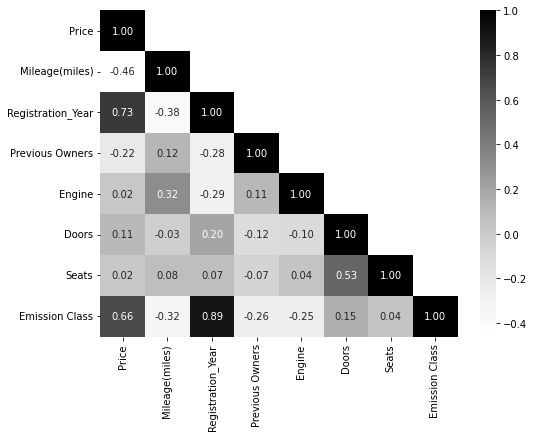

In [132]:
# 'CustomerID' 열을 제외(drop)하고 상관 관계 행렬 계산(corr())
corr = used_car_df.drop(columns=['title']).corr()

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
mask = np.zeros_like(corr) # np.zeros_like()는 0으로 가득찬 array 생성, 크기는 corr와 동일   
mask[np.triu_indices_from(mask, k=1)] = True # array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

'Emission Class'과 'Registration_Year' - 89 %   
'Price'와 'Registration_Year' - 73 %   
'Emission Class'과 'Price' - 66 &

## 회고

프로젝트를 하기 전 제대로 공부하고 시작하고 싶어서 이론 내용을 공부하는데 좀 오래 걸렸다   
전처리 부분에서 이론이 완벽히는 어느 정도 이해가 되는데 그 다음 데이터를 어떻게 분석하는지에 대해서는 아직 감이 안 오는 거 같다   
하지만 이건 아마 실습을 하면 할수록 더 이해가 되지 않을까 싶다   
이번 프로젝트에서는 결측치 개수가 많아서 해결하는데 좀 시간이 많이 걸렸다 그러나 괜찮은 방법을 생각해낸 것 같아서 뿌듯하다
앞으로도 매번 프로젝트에서 조금씩이라도 나아갈 수 있었으면 좋겠다